In [ ]:
from numpy import mean 
from pandas import read_csv
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder ,QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
def get_dataset():
    dataset = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
    data = dataset.values
    X = data[:,:-1]
    y = data[:,-1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X,y

In [3]:
def get_model():
    models = {}
    for r in range(1,100):
        transform = QuantileTransformer(n_quantiles=r,output_distribution='uniform')
        model = KNeighborsClassifier()
        models[str(r)] = Pipeline(steps=[('transformer',transform),('model',model)])
    return models

In [4]:
def evaluate_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=87)
    score = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
    return score

In [5]:
X , y = get_dataset()
models = get_model()
results = []
best_result = 0

In [6]:
for name ,model in models.items():
    scores = evaluate_model(model,X,y)
    mean_scores = mean(scores)
    std_scores = mean(scores)
    best_result = best_result if best_result > mean_scores else mean_scores
    results.append(mean_scores)
    print('>%s %.3f (%.3f)' % (name ,mean_scores ,std_scores))
print('best_result : %.3f'% (best_result))

>1 0.464 (0.464)
>2 0.839 (0.839)
>3 0.845 (0.845)
>4 0.854 (0.854)
>5 0.849 (0.849)
>6 0.854 (0.854)
>7 0.844 (0.844)
>8 0.846 (0.846)
>9 0.848 (0.848)
>10 0.841 (0.841)
>11 0.844 (0.844)
>12 0.841 (0.841)
>13 0.846 (0.846)
>14 0.841 (0.841)
>15 0.841 (0.841)
>16 0.844 (0.844)
>17 0.846 (0.846)
>18 0.844 (0.844)
>19 0.844 (0.844)
>20 0.843 (0.843)
>21 0.843 (0.843)
>22 0.841 (0.841)
>23 0.843 (0.843)
>24 0.843 (0.843)
>25 0.846 (0.846)
>26 0.846 (0.846)
>27 0.843 (0.843)
>28 0.848 (0.848)
>29 0.846 (0.846)
>30 0.843 (0.843)
>31 0.844 (0.844)
>32 0.843 (0.843)
>33 0.844 (0.844)
>34 0.844 (0.844)
>35 0.843 (0.843)
>36 0.843 (0.843)
>37 0.846 (0.846)
>38 0.844 (0.844)
>39 0.844 (0.844)
>40 0.846 (0.846)
>41 0.841 (0.841)
>42 0.846 (0.846)
>43 0.844 (0.844)
>44 0.848 (0.848)
>45 0.844 (0.844)
>46 0.843 (0.843)
>47 0.841 (0.841)
>48 0.844 (0.844)
>49 0.844 (0.844)
>50 0.846 (0.846)
>51 0.843 (0.843)
>52 0.848 (0.848)
>53 0.844 (0.844)
>54 0.846 (0.846)
>55 0.848 (0.848)
>56 0.846 (0.846)
>

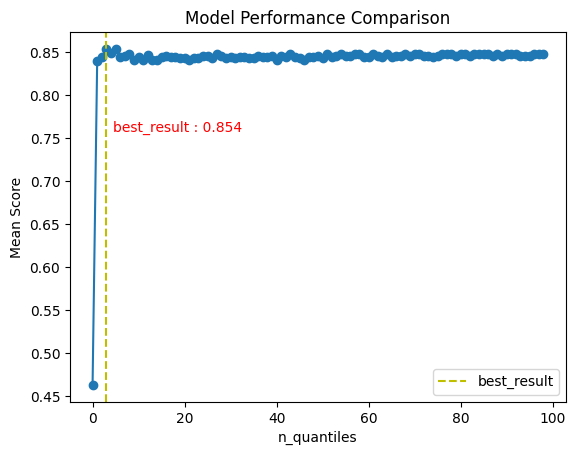

In [7]:
pyplot.plot(results,marker ='o',linestyle ='-')
max_idex = results.index(best_result)
pyplot.axvline(x = max_idex,color = 'y',linestyle ='--',label = 'best_result')
text_X = max_idex + 1.5
text_y = best_result - 0.1
pyplot.text(text_X,text_y,f'best_result : {best_result:.3f}',color = 'red' ,ha = 'left' ,va = 'bottom')
pyplot.xlabel('n_quantiles')
pyplot.ylabel('Mean Score')
pyplot.title('Model Performance Comparison')
pyplot.legend()